TEST VERSION BP 230107

<h1>RSoXS plan simulator</h1>
this is a full stack of the SST scan system, from the loader through to the low level acquisition code, all simulated here
run all the hidden cells first!

In [1]:
%load_ext autoreload
%autoreload 2
from rsoxs_scans.spreadsheets import load_samplesxlsx, save_samplesxlsx
from rsoxs_scans.acquisition import dryrun_bar

In [2]:
# test your .xlsx file here
# load the example bar
bar = load_samplesxlsx(r"Sample_Bar_template_v2023_1.xlsx")

Reading sheet Bar


/srv/conda/envs/notebook/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reading sheet Acquisitions


/srv/conda/envs/notebook/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
save_samplesxlsx(bar,'test2.xlsx') # test writing to a temporary file

In [4]:
bar2 = load_samplesxlsx("test2.xlsx") # test loading from a temporary file

Reading sheet Bar
Reading sheet Acquisitions


In [24]:
# dry run it
outputs = dryrun_bar(bar,['apriority'],group='groupA')

/nsls2/users/bpatel/BP_LocalCodeBase/rsoxs_scans/rsoxs_scans/acquisition.py:259: UserWarning: WARNING: acquisition # 38 will take 42.25 minutes, which is more than 30.0 minutes
  warnings.warn(
/nsls2/users/bpatel/BP_LocalCodeBase/rsoxs_scans/rsoxs_scans/acquisition.py:259: UserWarning: WARNING: acquisition # 39 will take 192.55 minutes, which is more than 30.0 minutes
  warnings.warn(
/nsls2/users/bpatel/BP_LocalCodeBase/rsoxs_scans/rsoxs_scans/acquisition.py:259: UserWarning: WARNING: acquisition # 41 will take 122.0 minutes, which is more than 30.0 minutes
  warnings.warn(
/nsls2/users/bpatel/BP_LocalCodeBase/rsoxs_scans/rsoxs_scans/acquisition.py:259: UserWarning: WARNING: acquisition # 44 will take 42.0 minutes, which is more than 30.0 minutes
  warnings.warn(


________________________________________________
Acquisition # 0 from sample p3ht group all

Summary: load p3ht from testing, config SAXS, run rsoxs priority( sample 1 acquisition 1), starts @ 0:00:00 takes 0:10:00
 (+120 seconds for configuration change)

load configurationSAXS
load sample p3ht
set Diode range to high

 setting polarization to 0
 RSoXS scanning ['saxs_det'] from 250.0 eV to 350.0 eV on the rsoxs l/mm grating
    in 114 steps with exposure times from 1.0 to 1.0 seconds

________________________________________________
________________________________________________
Acquisition # 1 from sample pcbm group all

Summary: load pcbm from testing, config WAXS, run nexafs priority( sample 2 acquisition 2), starts @ 0:12:00 takes 0:03:10
 (+120 seconds for configuration change)

load configurationWAXS
load sample pcbm
set Diode range to high

 setting polarization to 0
 setting grating to rsoxs
 fly nexafs scanning from 250.0 eV to 350.0 eV on the rsoxs l/mm grating
    at spe

In [6]:
outputs[30]

{'description': 'set Diode range to high\n',
 'action': 'diode_high',
 'acq_index': 7,
 'queue_step': 2,
 'acq_time': 126.0,
 'total_acq': 68,
 'time_before': 3442.0,
 'priority': 8,
 'uid': 'b495a828-8efd-11ed-9899-3cecef3ab271',
 'group': 'all',
 'slack_message_start': '',
 'slack_message_end': '',
 'total_queue_time': 60471.0,
 'time_after': 56903.0}

In [7]:
# get the set of all actions
actions = set()
for acq in outputs:
    actions.add(acq['action'])
print(actions)

{'load_configuration', 'message', 'diode_low', 'diode_high', 'load_sample', 'nexafs_scan_core', 'rsoxs_scan_core', 'spiral_scan_core'}


In [8]:
arguments = {}
for action in actions:
    keys = set()
    for acq in outputs:
        if acq['action'] == action:
            if 'kwargs' in acq:
                for kwarg in acq['kwargs']:
                    keys.add(kwarg)
    arguments[action]=keys
    print("{:<18} : {}".format(action,keys))

load_configuration : {'configuration'}
message            : set()
diode_low          : set()
diode_high         : set()
load_sample        : {'sample'}
nexafs_scan_core   : {'pol', 'scan_params', 'angle', 'cycles', 'grating'}
rsoxs_scan_core    : {'enscan_type', 'temp_wait', 'polarizations', 'energies', 'times', 'temps_with_locations', 'locations', 'md', 'repeats', 'grating', 'dets'}
spiral_scan_core   : {'stepsize', 'pol', 'angle', 'grating', 'dets', 'diameter', 'exposure', 'energy'}


In [9]:
def get_queue(acq,outputs):
    return list(filter(lambda outputs: outputs['queue_step'] == acq, outputs))
display(get_queue(2,outputs))

[{'description': 'set Diode range to high\n',
  'action': 'diode_high',
  'acq_index': 0,
  'queue_step': 2,
  'acq_time': 600.0,
  'total_acq': 68,
  'time_before': 120,
  'priority': 1,
  'uid': 'b495a044-8efd-11ed-9899-3cecef3ab271',
  'group': 'all',
  'slack_message_start': '',
  'slack_message_end': '',
  'total_queue_time': 60471.0,
  'time_after': 59751.0},
 {'description': 'set Diode range to high\n',
  'action': 'diode_high',
  'acq_index': 1,
  'queue_step': 2,
  'acq_time': 190.0,
  'total_acq': 68,
  'time_before': 840.0,
  'priority': 2,
  'uid': 'b495a238-8efd-11ed-9899-3cecef3ab271',
  'group': 'all',
  'slack_message_start': '',
  'slack_message_end': '',
  'total_queue_time': 60471.0,
  'time_after': 59441.0},
 {'description': 'set Diode range to high\n',
  'action': 'diode_high',
  'acq_index': 2,
  'queue_step': 2,
  'acq_time': 414.0,
  'total_acq': 68,
  'time_before': 1030.0,
  'priority': 3,
  'uid': 'b495a346-8efd-11ed-9899-3cecef3ab271',
  'group': 'all',
  's

<h1>Examples of edges, ratios, frames

[1850.  1850.8 1851.6 1852.4 1853.2 1854.  1854.8 1855.6 1856.4 1857.2
 1858.  1858.8 1859.6 1860.4 1861.2 1862.  1862.8 1863.6 1864.4 1865.2
 1866.  1866.8 1867.6 1868.4 1869.2 1870.  1870.8 1871.6 1872.4 1873.2
 1874.  1874.8 1875.6 1876.4 1877.2 1878.  1878.8 1879.6 1880.4 1881.2
 1882.  1882.8 1883.6 1884.4 1885.2 1886.  1886.8 1887.6 1888.4 1889.2
 1890.  1890.8 1891.6 1892.4 1893.2 1894.  1894.8 1895.6 1896.4 1897.2
 1898.  1898.8 1899.6 1900.4 1901.2 1902.  1902.8 1903.6 1904.4 1905.2
 1906.  1906.8 1907.6 1908.4 1909.2 1910.  1910.8 1911.6 1912.4 1913.2
 1914.  1914.8 1915.6 1916.4 1917.2 1918.  1918.8 1919.6 1920.4 1921.2
 1922.  1922.8 1923.6 1924.4 1925.2 1926.  1926.8 1927.6 1928.4 1929.2
 1930. ]
101


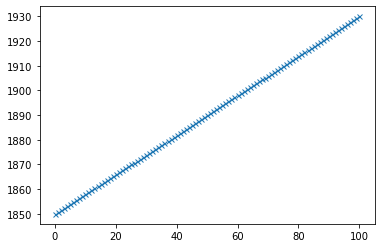

In [10]:
# totally manual simple scan
from rsoxs_scans.constructor import get_energies
energies = get_energies((1850,1930),100)

[250.   250.   250.   340.   340.   341.   280.   281.45 500.   500.  ]
10


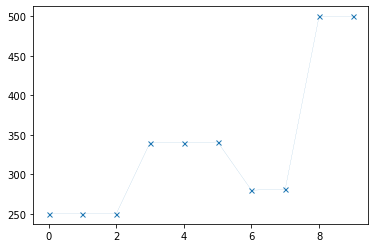

In [11]:
# precise energy list
# you can fool the algorithm if you put 1 as the number of frames it will only take one frame at each of the thresholds, including the last one, so you can sort of treat this as just an energy list
# as a corollary, you can't have a total number of frames less than the thresholds that you give it in edges (it will at a minimum always take the threshold values)
energies = get_energies((250,250,250,340,340,341,280,281.45,500,500),1)

[380.   381.3  382.6  383.9  385.25 386.55 387.85 389.15 390.45 391.75
 393.1  394.4  395.7  397.   397.15 397.25 397.4  397.55 397.65 397.8
 397.9  398.05 398.2  398.3  398.45 398.6  398.7  398.85 398.95 399.1
 399.25 399.35 399.5  399.65 399.75 399.9  400.05 400.15 400.3  400.4
 400.55 400.7  400.8  400.95 401.1  401.2  401.35 401.45 401.6  401.75
 401.85 402.   402.15 402.25 402.4  402.55 402.65 402.8  402.9  403.05
 403.2  403.3  403.45 403.6  403.7  403.85 403.95 404.1  404.25 404.35
 404.5  404.65 404.75 404.9  405.05 405.15 405.3  405.4  405.55 405.7
 405.8  405.95 406.1  406.2  406.35 406.45 406.6  406.75 406.85 407.
 408.3  409.65 410.95 412.3  413.6  414.9  416.25 417.55 418.9  420.2
 421.5  422.85 424.15 425.5  426.8  428.1  429.45 430.75 432.1  433.4
 434.7  436.05 437.35 438.7  440.  ]
115


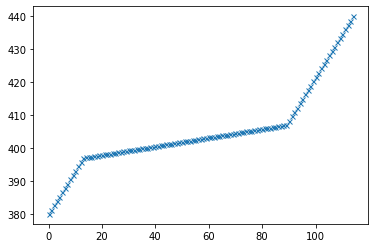

In [12]:
# use a default
energies = get_energies('Nitrogen')

[250.  255.  260.  265.  270.  271.  272.  273.  274.  275.  276.  277.
 278.  279.  280.  281.  282.  282.1 282.2 282.3 282.4 282.5 282.6 282.7
 282.8 282.9 283.  283.1 283.2 283.3 283.4 283.5 283.6 283.7 283.8 283.9
 284.  284.1 284.2 284.3 284.4 284.5 284.6 284.7 284.8 284.9 285.  285.1
 285.2 285.3 285.4 285.5 285.6 285.7 285.8 285.9 286.  286.1 286.2 286.3
 286.4 286.5 286.6 286.7 286.8 286.9 287.  287.2 287.4 287.6 287.8 288.
 288.2 288.4 288.6 288.8 289.  289.2 289.4 289.6 289.8 290.  290.2 290.4
 290.6 290.8 291.  291.2 291.4 291.6 291.8 292.  293.  294.  295.  296.
 297.  298.  299.  300.  301.  302.  303.  304.  305.  310.  315.  320.
 325.  330.  335.  340.  345.  350. ]
114


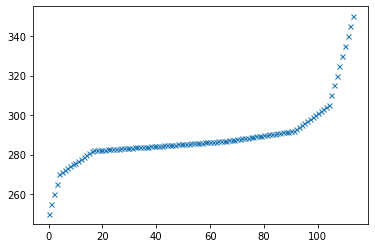

In [13]:
# use a default with a different name
energies = get_energies('c')

[250.  255.  260.  265.  270.  271.  272.  273.  274.  275.  276.  277.
 278.  279.  280.  281.  282.  282.2 282.4 282.6 282.8 283.  283.2 283.4
 283.6 283.8 284.  284.2 284.4 284.6 284.8 285.  285.2 285.4 285.6 285.8
 286.  286.2 286.4 286.6 286.8 287.  287.1 287.2 287.3 287.4 287.5 287.6
 287.7 287.8 287.9 288.  288.1 288.2 288.3 288.4 288.5 288.6 288.7 288.8
 288.9 289.  289.1 289.2 289.3 289.4 289.5 289.6 289.7 289.8 289.9 290.
 290.1 290.2 290.3 290.4 290.5 290.6 290.7 290.8 290.9 291.  291.1 291.2
 291.3 291.4 291.5 291.6 291.7 291.8 291.9 292.  293.  294.  295.  296.
 297.  298.  299.  300.  301.  302.  303.  304.  305.  310.  315.  320.
 325.  330.  335.  340.  345.  350. ]
114


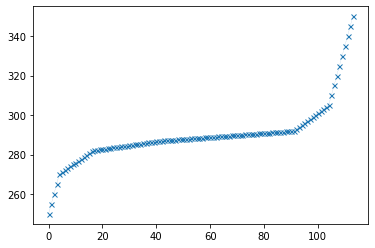

In [14]:
# use a different built in interval set
energies = get_energies('c','full','carbon nonaromatic')

[250.   270.   273.   276.   279.   282.   282.55 283.1  283.65 284.2
 284.8  285.35 285.9  286.45 287.   287.3  287.55 287.85 288.1  288.4
 288.65 288.95 289.2  289.5  289.8  290.05 290.35 290.6  290.9  291.15
 291.45 291.7  292.   294.6  297.2  299.8  302.4  305.   320.   335.
 350.  ]
41


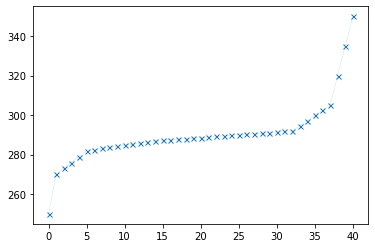

In [15]:
# get a very short version of this scan
energies = get_energies('c','very short','carbon nonaromatic')

[250.   270.   282.   284.5  287.   288.25 289.5  290.75 292.   305.
 350.  ]
11


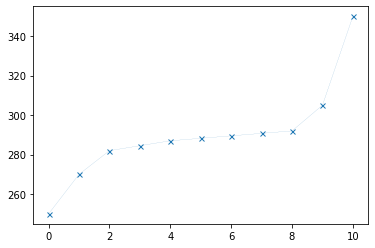

In [16]:
# I don't have time for this, I only want ~10 energies
energies = get_energies('c',10,'carbon nonaromatic')

[280.]
1


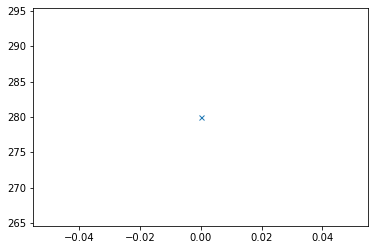

In [17]:
# also, I made single entry energies also work
energies = get_energies(280)

[250.   260.   270.   272.4  274.8  277.2  279.6  282.   282.5  283.
 283.5  284.   284.5  285.   285.5  286.   286.5  287.   287.1  287.25
 287.4  287.5  287.6  287.75 287.9  288.   288.1  288.25 288.4  288.5
 288.6  288.75 288.9  289.   289.1  289.25 289.4  289.5  289.6  289.75
 289.9  290.   290.1  290.25 290.4  290.5  290.6  290.75 290.9  291.
 291.1  291.25 291.4  291.5  291.6  291.75 291.9  292.   294.6  297.2
 299.8  302.4  305.   327.5  350.  ]
65


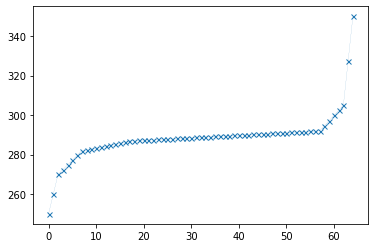

In [18]:
# also option to have frames as a list of exact numbers needed in each region
energies = get_energies('c',[2,5,10,40,5,2])

[250.  260.  270.  272.4 274.8 277.2 279.6 282.  282.5 283.  283.5 284.
 284.5 285.  285.5 286.  286.5 292.  294.6 297.2 299.8 302.4 305.  327.5
 350. ]
25


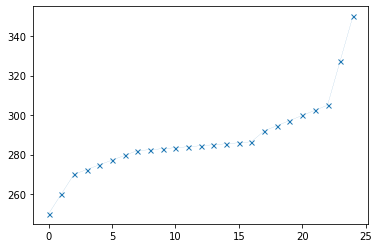

In [19]:
# putting in zero effectively removes that region
energies = get_energies('c',[2,5,10,0,5,2])

[270.   270.1  270.2  270.3  270.4  270.5  270.6  270.75 270.85 270.95
 271.05 271.15 271.25 271.35 271.45 271.55 271.65 271.75 271.9  272.
 272.1  272.2  272.3  272.4  272.5  272.6  272.7  272.8  272.9  273.
 273.1  273.25 273.35 273.45 273.55 273.65 273.75 273.85 273.95 274.05
 274.15 274.25 274.4  274.5  274.6  274.7  274.8  274.9  275.   275.1
 275.2  275.3  275.4  275.5  275.6  275.75 275.85 275.95 276.05 276.15
 276.25 276.35 276.45 276.55 276.65 276.75 276.9  277.   277.1  277.2
 277.3  277.4  277.5  277.6  277.7  277.8  277.9  278.   278.1  278.25
 278.35 278.45 278.55 278.65 278.75 278.85 278.95 279.05 279.15 279.25
 279.4  279.5  279.6  279.7  279.8  279.9  280.   280.05 280.1  280.15
 280.2  280.25 280.3  280.35 280.4  280.45 280.5  280.55 280.6  280.7
 280.75 280.8  280.85 280.9  280.95 281.   281.05 281.1  281.15 281.2
 281.25 281.3  281.35 281.4  281.45 281.5  281.55 281.6  281.65 281.7
 281.75 281.8  281.9  281.95 282.   282.05 282.1  282.15 282.2  282.25
 282.3  282.35 

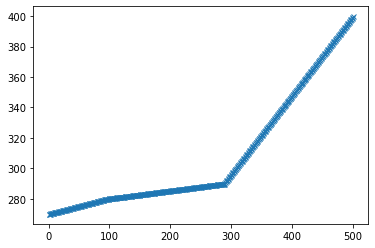

501

In [20]:
from rsoxs_scans.constructor import construct_exposure_times
times,_ = construct_exposure_times(get_energies([270,280,290,400],500,[2,1,10]),1)
len(times)

In [21]:
from rsoxs_scans.constructor import get_nexafs_scan_params
get_nexafs_scan_params('n','normal')

[(370, 397, 1.0), (397, 407, 0.2), (407, 440, 1.0)]
3
time : 0:01:50


([(370, 397, 1.0), (397, 407, 0.2), (407, 440, 1.0)], 110.0)

<h1>Example of complex Exposure times

[1850.  1850.8 1851.6 1852.4 1853.2 1854.  1854.8 1855.6 1856.4 1857.2
 1858.  1858.8 1859.6 1860.4 1861.2 1862.  1862.8 1863.6 1864.4 1865.2
 1866.  1866.8 1867.6 1868.4 1869.2 1870.  1870.8 1871.6 1872.4 1873.2
 1874.  1874.8 1875.6 1876.4 1877.2 1878.  1878.8 1879.6 1880.4 1881.2
 1882.  1882.8 1883.6 1884.4 1885.2 1886.  1886.8 1887.6 1888.4 1889.2
 1890.  1890.8 1891.6 1892.4 1893.2 1894.  1894.8 1895.6 1896.4 1897.2
 1898.  1898.8 1899.6 1900.4 1901.2 1902.  1902.8 1903.6 1904.4 1905.2
 1906.  1906.8 1907.6 1908.4 1909.2 1910.  1910.8 1911.6 1912.4 1913.2
 1914.  1914.8 1915.6 1916.4 1917.2 1918.  1918.8 1919.6 1920.4 1921.2
 1922.  1922.8 1923.6 1924.4 1925.2 1926.  1926.8 1927.6 1928.4 1929.2
 1930. ]
101


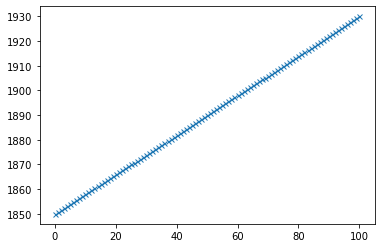

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 29423.0)

In [22]:
construct_exposure_times(get_energies((1850,1930),100),[2,("between",1870,1900.0),4,("greater_than",1920.0),1],80)